In [1]:
import pandas as pd
import numpy as np
from category_encoders import BinaryEncoder
from sklearn.preprocessing import power_transform, OrdinalEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
import seaborn as sns
import re
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('car_data_2.csv')

## data has been treated for duplicates and missing values;
         EDA

In [3]:
data.shape

(6717, 12)

# Detecting outliers using graphical methods

In [4]:
data.head()

,Car_Model,Make_yr,Sell_Price,Kms_Driven,Fuel_Type,Seller_Type,Trans_Type,Owner,Mileage_kmpl,Engine_CC,Power_bhp,Seating_cap
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5


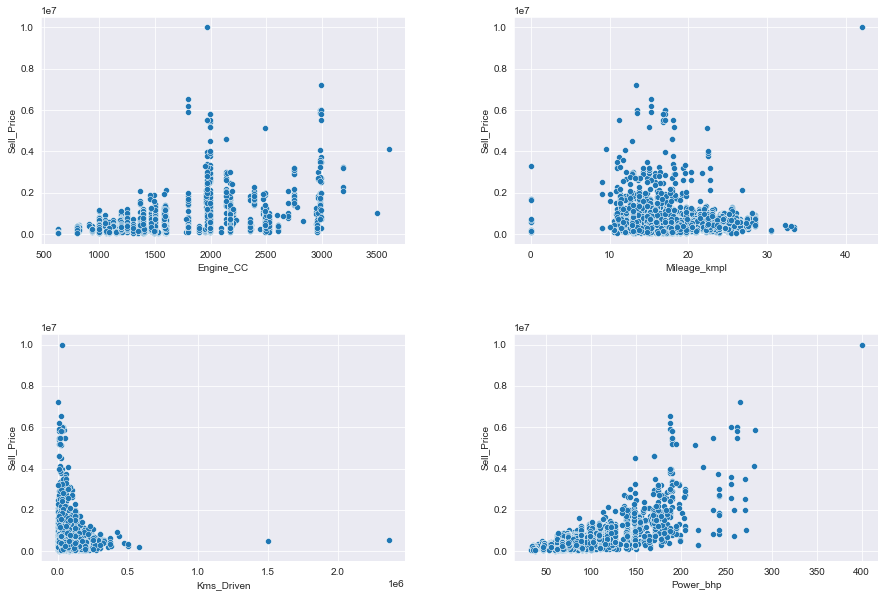

In [5]:
fig = plt.figure(figsize = (15,10))

fig.subplots_adjust(hspace = 0.4, wspace =0.3)
plt.subplot(2,2,1)
sns.scatterplot(x = 'Engine_CC',y = 'Sell_Price',data = data)

plt.subplot(2,2,2)
sns.scatterplot(x = 'Mileage_kmpl',y = 'Sell_Price',data = data)

plt.subplot(2,2,3)
sns.scatterplot(x = 'Kms_Driven',y = 'Sell_Price',data = data)

plt.subplot(2,2,4)
sns.scatterplot(x = 'Power_bhp',y = 'Sell_Price',data = data)

plt.show()

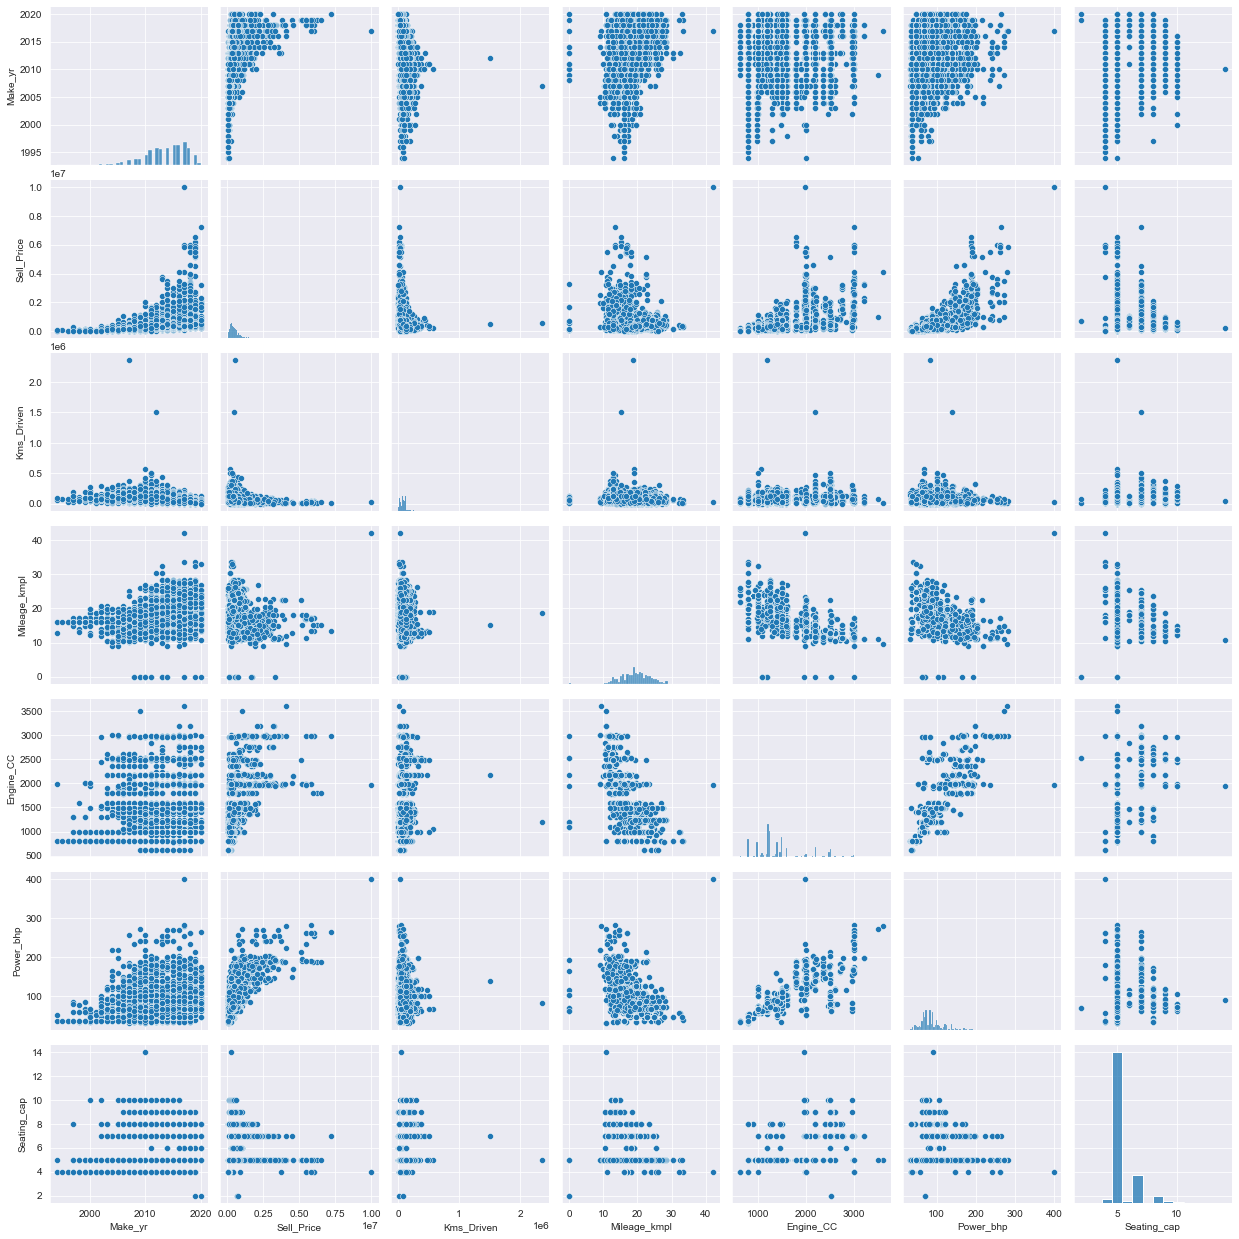

In [6]:
sns.pairplot(data)

In [7]:
# removing records that have outliers in Kilometer_driven:

Kms_Driven = data[data.Kms_Driven>1000000].index.tolist()
data.drop(labels = Kms_Driven ,inplace =True)
data.shape

(6715, 12)

# Exploratory Analysis of our datasheet 

In [8]:
# creating 'Brand' the new coloumn containing only the Brand Name of cars#

data['Brand'] = data.Car_Model.str.split().str.get(0)
data.head(5)

,Car_Model,Make_yr,Sell_Price,Kms_Driven,Fuel_Type,Seller_Type,Trans_Type,Owner,Mileage_kmpl,Engine_CC,Power_bhp,Seating_cap,Brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,Maruti


Finding the relation between 'Sell_Price' and different independent variables.

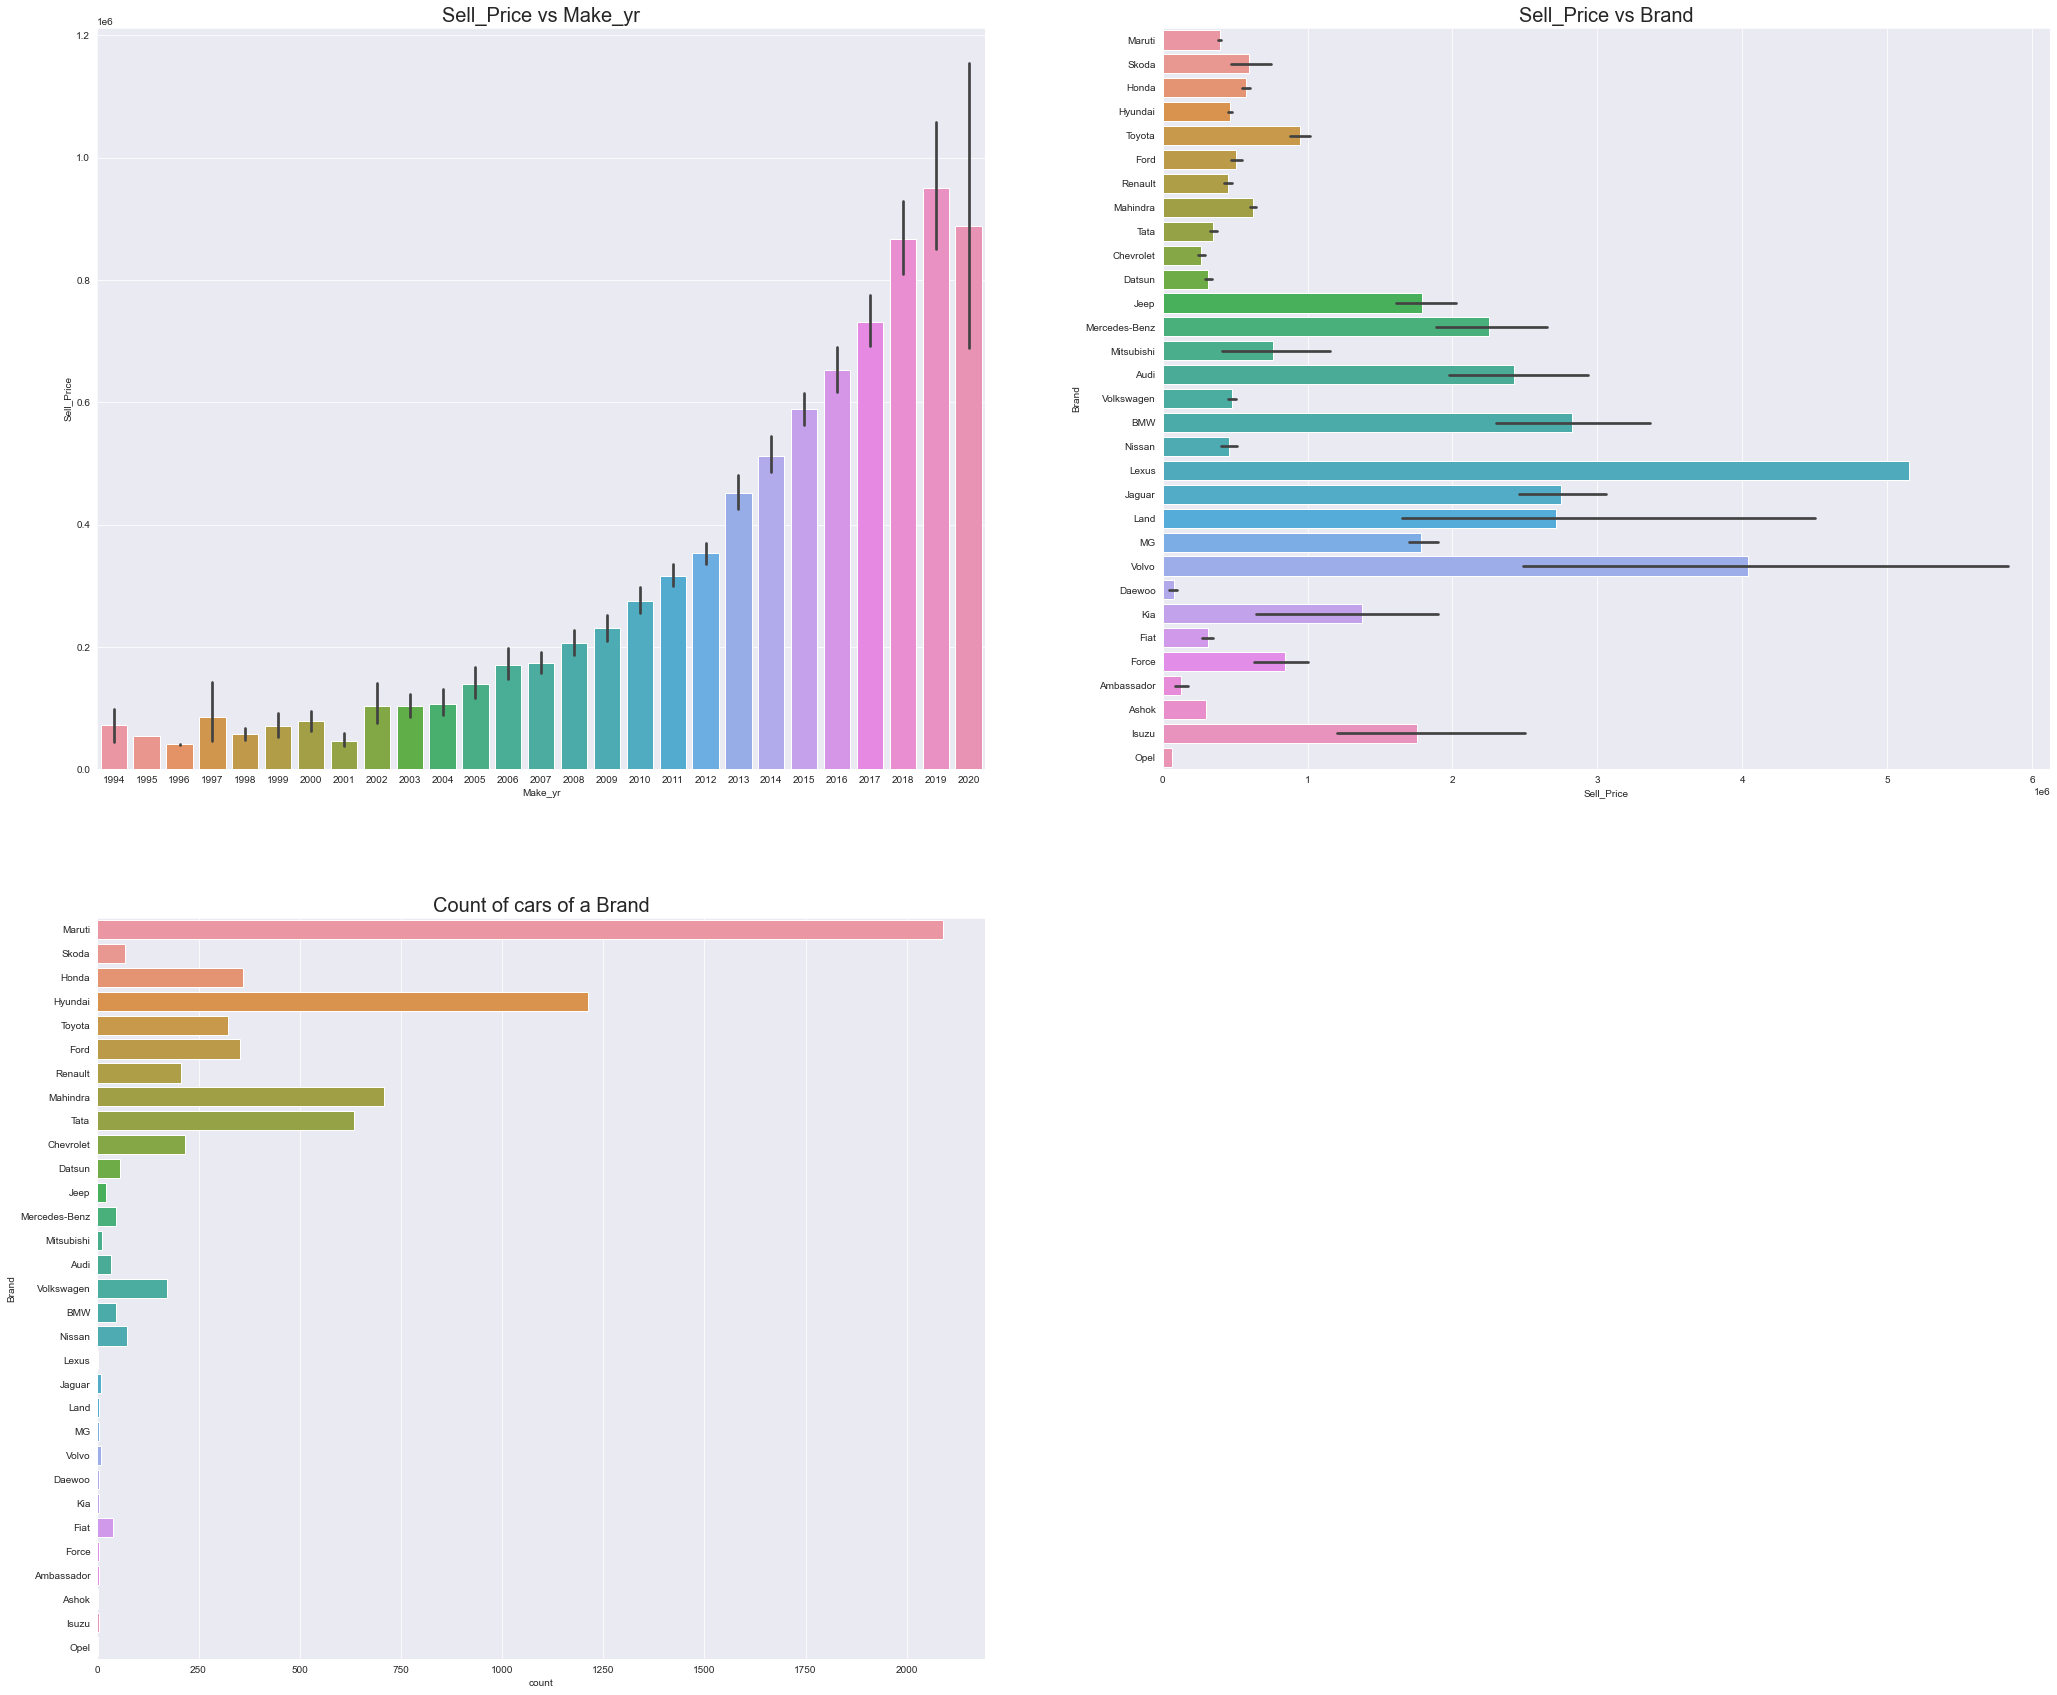

In [9]:
fig = plt.figure(figsize = (35,30))


# Relation between Sell_Price and year
plt.subplot(2,2,1)
sns.barplot(x ='Make_yr', y ='Sell_Price', data  = data)
plt.title('Sell_Price vs Make_yr',fontsize = 20)

# Relation between Sell_Price and Brand
plt.subplot(2,2,2)
sns.barplot(x = 'Sell_Price', y ='Brand', data  = data)
plt.title('Sell_Price vs Brand',fontsize= 20)

# finding the brand having the highest number of cars in our dataset:

plt.subplot(2,2,3)
sns.countplot(y ='Brand', data  = data)
plt.title('Count of cars of a Brand',fontsize =20)

plt.show()

Insights:

1.The Price of cars increases gradually year by year.

2.The Highest price of car is Lamborghini and lowest price of car is Maruti and thus the highest number of cars owned by people is of brand Maruti.

3.Mercedenz-Benz and BMW cars are owned by sufficient number of people despite of their high prices.

NOTE :- We can say that the lesser the price of a car then it is more likely to be bought by people.

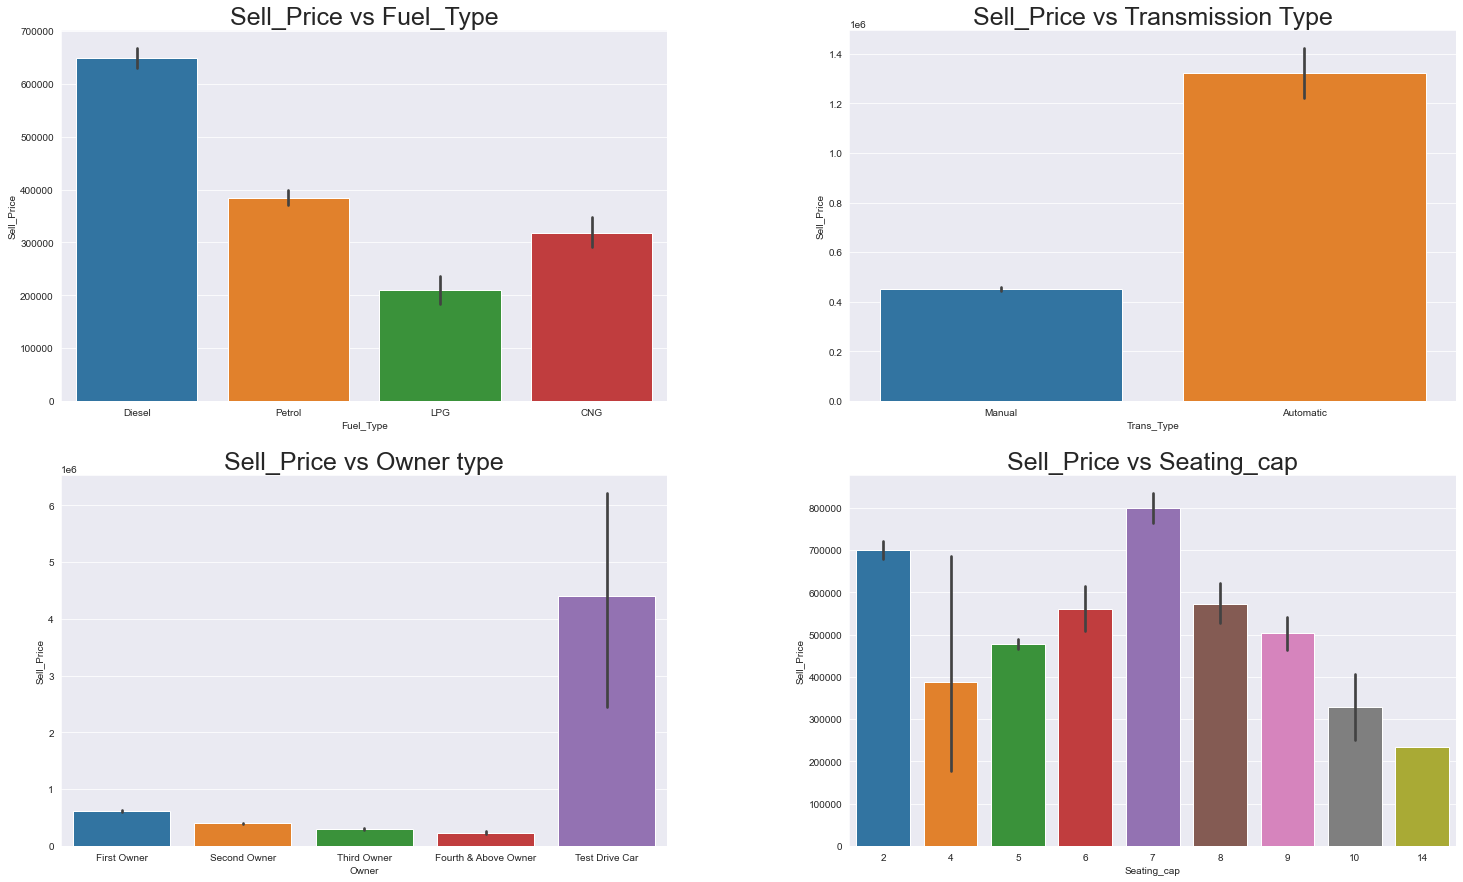

In [10]:
fig = plt.figure(figsize = (25,15))

fig.subplots_adjust(hspace = 0.2, wspace =0.3)
plt.subplot(2,2,1)

#Relation between Price and Fuel type
sns.barplot(x = 'Fuel_Type', y = 'Sell_Price', data = data)
plt.title('Sell_Price vs Fuel_Type',fontsize=25)

#Relation between Price and transmission
plt.subplot(2,2,2)
sns.barplot(x ='Trans_Type', y ='Sell_Price', data = data)
plt.title('Sell_Price vs Transmission Type',fontsize  =25)

#Relation between price and owner type
plt.subplot(2,2,3)
sns.barplot(x ='Owner', y ='Sell_Price', data = data)
plt.title('Sell_Price vs Owner type',fontsize =25)

#Relation between price and seats
plt.subplot(2,2,4)
sns.barplot(x ='Seating_cap', y ='Sell_Price', data  = data)
plt.title('Sell_Price vs Seating_cap',fontsize=25)

plt.show()

Insights :

1.From above, price of Diesel cars is higher than that of Petrol type cars. CNG and LPG cars prices are lowest.
2.Price vs Transimission Automatic cars have higher prices than Manual type.
3.As the number of owner of a car increases the price of that car decreases.
4. 7 seater cars are of Highest prices followed by 2 seaters. 

Text(0, 0.5, 'Count of cars')

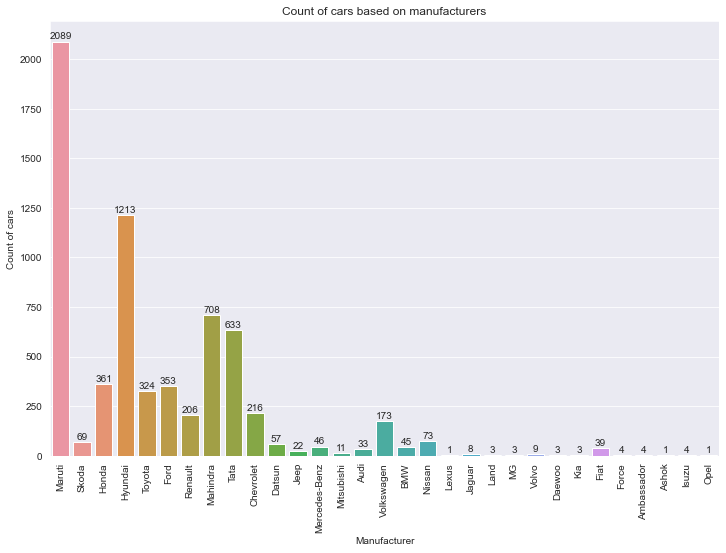

In [11]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Brand', data = data)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [12]:
data.columns

Index(['Car_Model', 'Make_yr', 'Sell_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Trans_Type', 'Owner', 'Mileage_kmpl', 'Engine_CC',
       'Power_bhp', 'Seating_cap', 'Brand'],
      dtype='object')

Seaborn lmplot

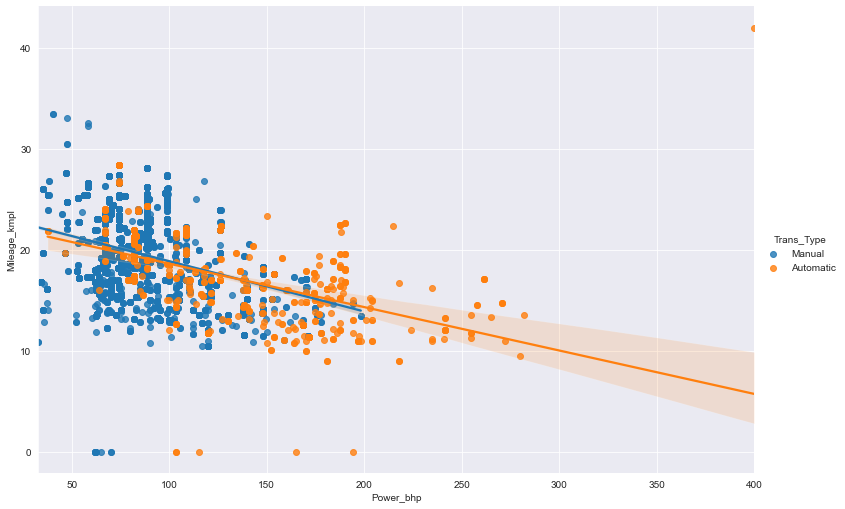

In [13]:
#scatterplot and regression lines for cars with different transmission
sns.lmplot('Power_bhp' , 'Mileage_kmpl' , data = data, hue = 'Trans_Type' , height = 7 , aspect = 1.5);

In [14]:
data_1 = data.copy()

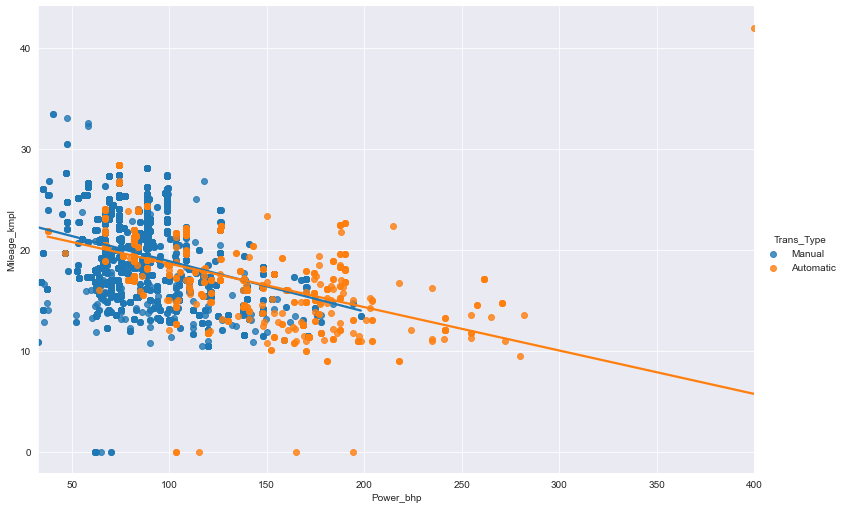

In [15]:
#removing the confidence bounds

sns.lmplot('Power_bhp' , 'Mileage_kmpl' , data = data_1, hue = 'Trans_Type' , height = 7 , aspect = 1.5 , ci = None);

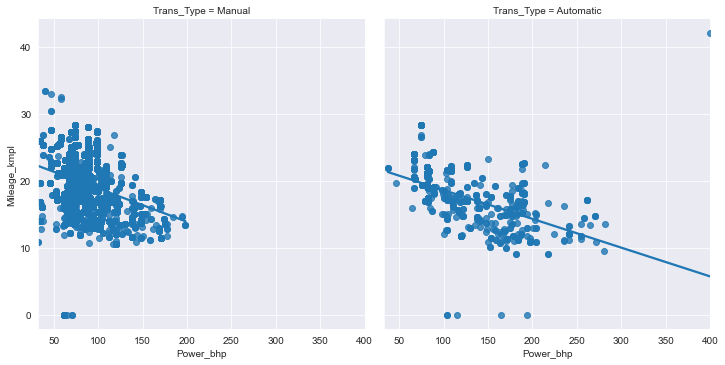

In [16]:
#using two facets using two categorical variables 

sns.lmplot('Power_bhp' , 'Mileage_kmpl' , data = data_1, col = 'Trans_Type' , ci = None);

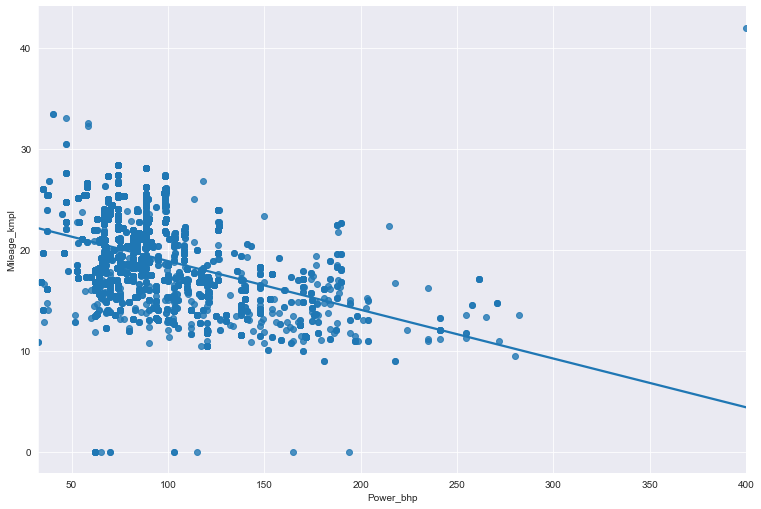

In [17]:
#ploynomial regression with lmplot

sns.lmplot('Power_bhp' , 'Mileage_kmpl' , data = data_1 , height = 7, aspect = 1.5, ci = None);

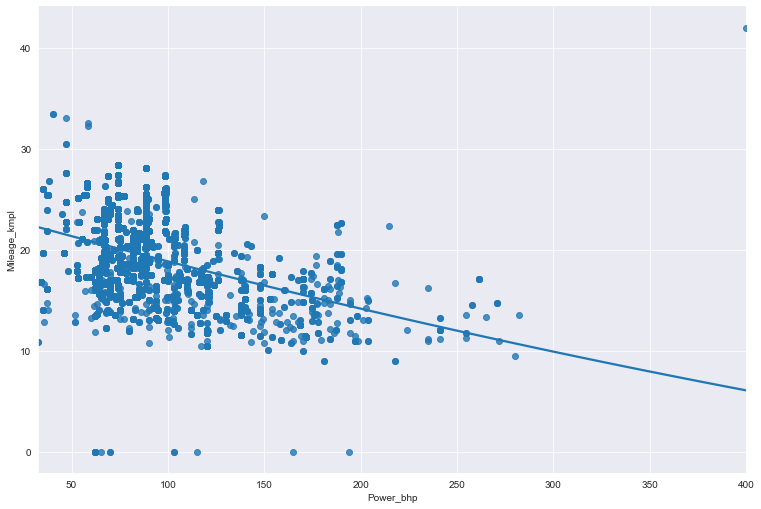

In [18]:
#ploynomial regression of order 2 with lmplot

sns.lmplot('Power_bhp' , 'Mileage_kmpl' , data = data_1 , height = 7, aspect = 1.5, ci = None , order = 2);


Relplot

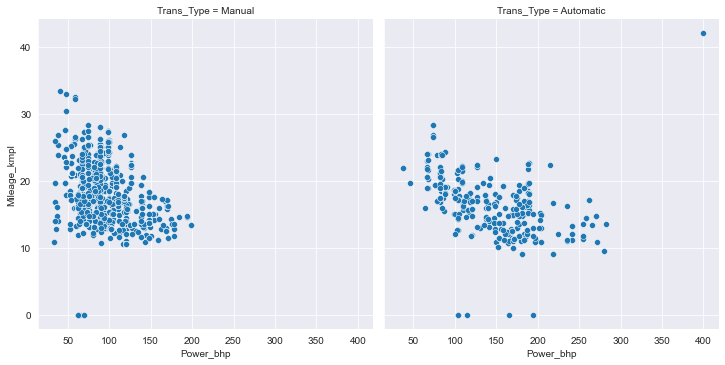

In [19]:
#two scatterplots splitting dataset by Man.trans.avail
sns.relplot(x = 'Power_bhp' ,y = 'Mileage_kmpl' , data = data_1, col = 'Trans_Type' );

Pairplots

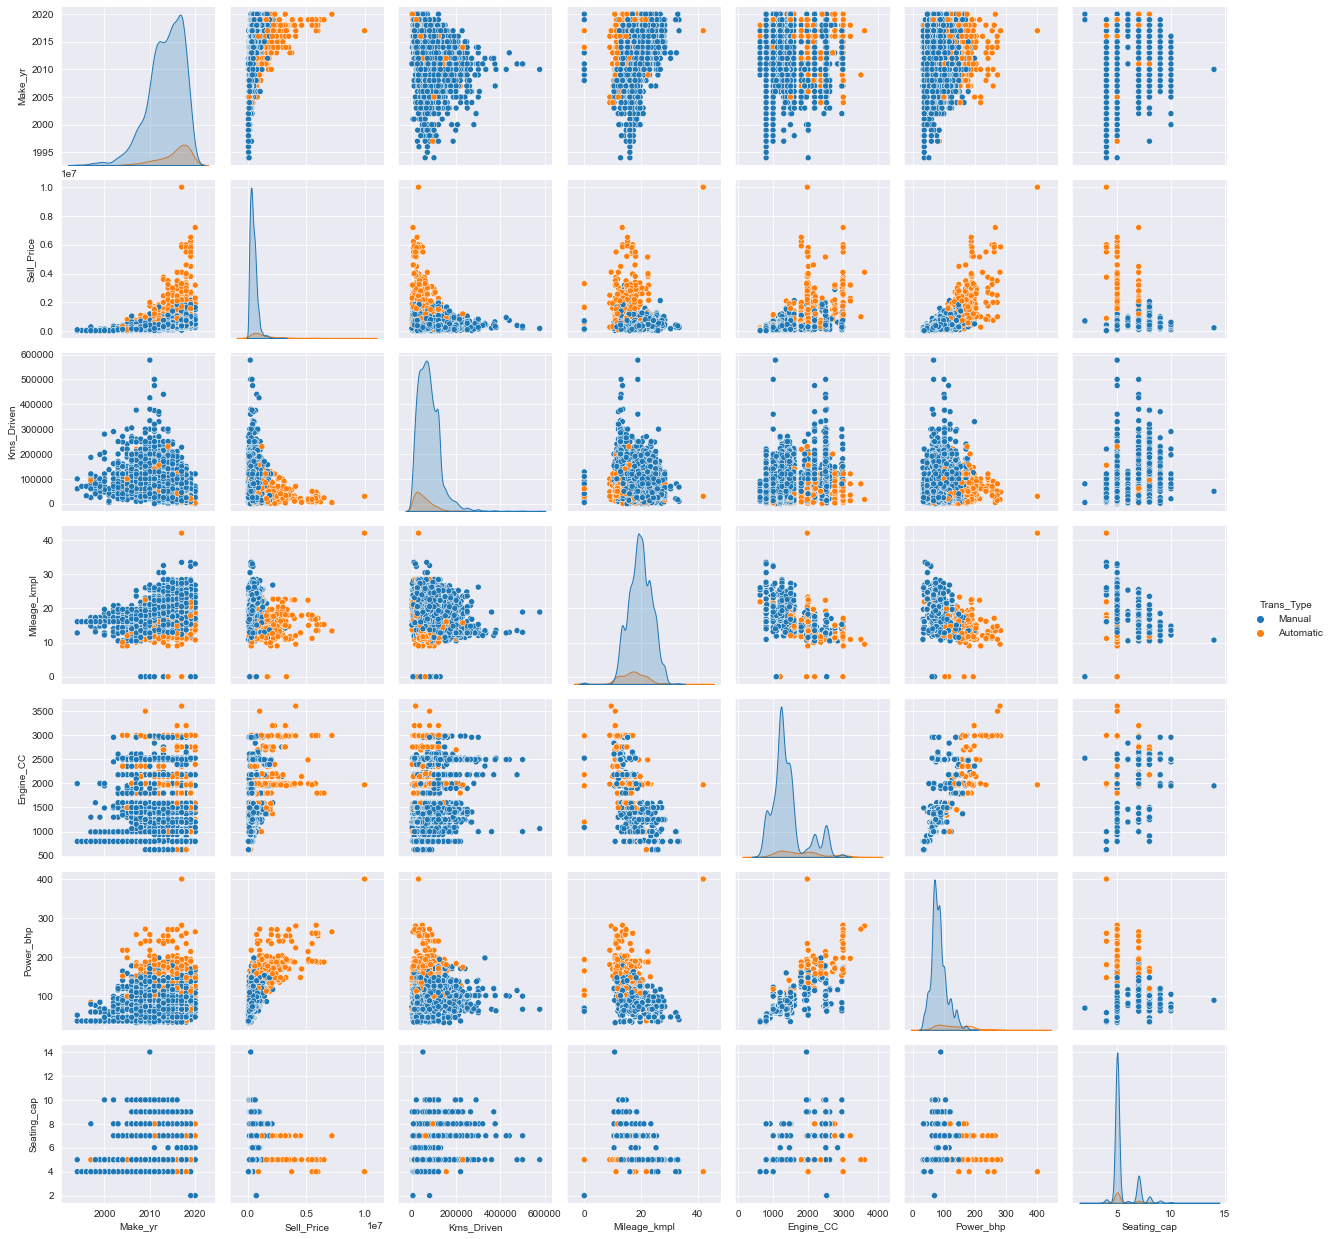

In [20]:
sns.pairplot(data_1, hue = 'Trans_Type');

In [21]:
data_1.corr()

,Make_yr,Sell_Price,Kms_Driven,Mileage_kmpl,Engine_CC,Power_bhp,Seating_cap
Make_yr,1.000000,0.427440,-0.454782,0.366044,-0.019797,0.160012,0.025018
Sell_Price,0.427440,1.000000,-0.194805,-0.108671,0.442870,0.692479,0.158578
Kms_Driven,-0.454782,-0.194805,1.000000,-0.230961,0.302779,0.044556,0.247191
Mileage_kmpl,0.366044,-0.108671,-0.230961,1.000000,-0.579085,-0.378462,-0.459081
Engine_CC,-0.019797,0.442870,0.302779,-0.579085,1.000000,0.683389,0.658578
Power_bhp,0.160012,0.692479,0.044556,-0.378462,0.683389,1.000000,0.258731
Seating_cap,0.025018,0.158578,0.247191,-0.459081,0.658578,0.258731,1.000000


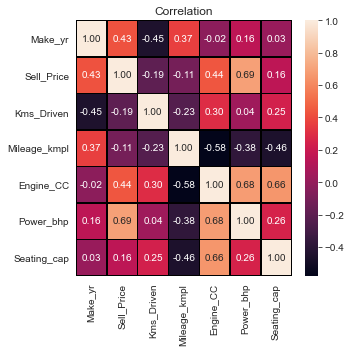

In [22]:
plt.figure(figsize = [5,5])
sns.heatmap(data_1.corr(),annot=True, linewidths=0.3,linecolor="black",fmt='.2f')
plt.title('Correlation')
plt.tight_layout()

Consider the year of manufacture and the price of a car. These values are positively correlated.

Kms_Driven and car prices are inversely correlated. The higher the Kms_Driven by the car is, the lower is its price.

The correlation table above indicates average positive correlation between price and year and average negative correlation between price and Kms_Driven.

Machine-learning algorithms can interpret numerical values with a high degree of precision. Therefore, we must convert the categorical data in our dataset into numerical values.


In [23]:
data_1.dtypes

Car_Model        object
Make_yr           int64
Sell_Price        int64
Kms_Driven        int64
Fuel_Type        object
Seller_Type      object
Trans_Type       object
Owner            object
Mileage_kmpl    float64
Engine_CC       float64
Power_bhp       float64
Seating_cap       int64
Brand            object
dtype: object

Next, we need to rescale and uniformize the values in selected columns. If these values are uniformly distributed, machine-learning algorithms will process them efficiently.

The logprice column is already uniformly distributed. To uniformize the other numerical columns, we will use the StandardScaler module of scikit-learn. StandardScaler can rescale a set of numerical values, giving the set a mean of 0 and a standard deviation of 1.

Encoding the categorical coloumns

In [24]:
data['Brand'].value_counts()

Maruti           2089
Hyundai          1213
Mahindra          708
Tata              633
Honda             361
Ford              353
Toyota            324
Chevrolet         216
Renault           206
Volkswagen        173
Nissan             73
Skoda              69
Datsun             57
Mercedes-Benz      46
BMW                45
Fiat               39
Audi               33
Jeep               22
Mitsubishi         11
Volvo               9
Jaguar              8
Force               4
Isuzu               4
Ambassador          4
MG                  3
Kia                 3
Daewoo              3
Land                3
Lexus               1
Ashok               1
Opel                1
Name: Brand, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

one_hot_trans1 = pd.get_dummies(data['Brand'])
df = data_1.join(one_hot_trans1)

one_hot_trans1 = pd.get_dummies(data['Trans_Type'])
df = data_1.join(one_hot_trans1)

one_hot_trans2 = pd.get_dummies(data['Fuel_Type'])
df = data_1.join(one_hot_trans2)

one_hot_trans3 = pd.get_dummies(data['Owner'])
df = data_1.join(one_hot_trans3)


In [26]:
df.head()

,Car_Model,Make_yr,Sell_Price,Kms_Driven,Fuel_Type,Seller_Type,Trans_Type,Owner,Mileage_kmpl,Engine_CC,Power_bhp,Seating_cap,Brand,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,Maruti,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,Skoda,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,Honda,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,Hyundai,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,Maruti,1,0,0,0,0


In [27]:
one_hot_trans1 = pd.get_dummies(df['Brand'])
df2 = df.join(one_hot_trans1)

In [28]:
one_hot_trans1 = pd.get_dummies(df2['Trans_Type'])
df3 = df2.join(one_hot_trans1)

In [29]:
one_hot_trans2 = pd.get_dummies(df3['Fuel_Type'])
df4 = df3.join(one_hot_trans2)

In [30]:
df4.head()

,Car_Model,Make_yr,Sell_Price,Kms_Driven,Fuel_Type,Seller_Type,Trans_Type,Owner,Mileage_kmpl,Engine_CC,Power_bhp,Seating_cap,Brand,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,Ambassador,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land,Lexus,MG,Mahindra,Maruti,Mercedes-Benz,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,Automatic,Manual,CNG,Diesel,LPG,Petrol
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,Maruti,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,Skoda,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,Honda,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,Hyundai,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,Maruti,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [31]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df4['Car_Model']= encoder.fit_transform(df4['Car_Model'])

In [32]:
df4.head()

,Car_Model,Make_yr,Sell_Price,Kms_Driven,Fuel_Type,Seller_Type,Trans_Type,Owner,Mileage_kmpl,Engine_CC,Power_bhp,Seating_cap,Brand,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,Ambassador,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land,Lexus,MG,Mahindra,Maruti,Mercedes-Benz,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,Automatic,Manual,CNG,Diesel,LPG,Petrol
0,1249,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,Maruti,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1546,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,Skoda,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,375,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,Honda,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,743,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,Hyundai,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,1290,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,Maruti,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [33]:
## dropping original columns from the encoded dataset also droping the target variable "Sell_Price" :

df4 = df4.drop(['Fuel_Type','Seller_Type','Trans_Type','Owner','Sell_Price'], axis=1)

In [34]:
df4.shape

(6715, 50)

In [35]:
df4 = df4.drop(['Brand'], axis=1)

In [36]:
## now analysing target variable:
target = df3['Sell_Price']

In [37]:
target.skew()

5.569937765658412

we will have to bring in uniformity into the dataset via an additional column. This column will contain uniformized versions of the values in the price column. To uniformize the values, we will apply a logarithmic function, log1p, to them. The logarithmic function will create a new scale for the price values. The price values will be distributed more evenly across this scale.

In [38]:
log_target = np.log1p(target)

In [39]:
log_target.skew()

-0.14296791742468104

In [40]:
x = df4.copy()
y = log_target.copy()

In [41]:
### Now Will remove outliers with the help of Z-score Method.

from scipy import stats

for column in x:
    if x[column].dtypes=="int64" or x[column].dtypes=="float64":
        z = np.abs(stats.zscore(x[column]))
        i = np.where(z>3)[0]
print(z)

[0.44130554 0.44130554 0.44130554 ... 0.44130554 0.44130554 0.44130554]


# Model Building

In [42]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 100)

In [44]:
import xgboost

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [46]:
LR = LinearRegression()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
XGB = XGBRegressor()
ABR = AdaBoostRegressor()

In [48]:
#training all of the models

LR.fit(x_train,y_train)
DT.fit(x_train,y_train)
RF.fit(x_train,y_train)
XGB.fit(x_train,y_train)
ABR.fit(x_train,y_train)

print("All Models Trained")

All Models Trained


In [49]:
#Accuracy scores
print('Linear Regression =',LR.score(x_train,y_train))
print('Decision Tree =',DT.score(x_train,y_train))
print('Random Forest =',RF.score(x_train,y_train))
print('XGB =',XGB.score(x_train,y_train))
print('Ada Boost Regressor =',ABR.score(x_train,y_train))

Linear Regression = 0.8904214011749786
Decision Tree = 0.9991640838483211
Random Forest = 0.9878103402257852
XGB = 0.9748842659429556
Ada Boost Regressor = 0.8295749317508655


In [50]:
#R2_Scores
from sklearn.metrics import r2_score

print('Linear Regression =', r2_score(y_test,LR.predict(x_test)))
print('Decision Tree =', r2_score(y_test,DT.predict(x_test)))
print('Random Forest =', r2_score(y_test,RF.predict(x_test)))
print('XGB =', r2_score(y_test,XGB.predict(x_test)))
print('Ada Boost Regressor =', r2_score(y_test,ABR.predict(x_test)))

Linear Regression = -2.5925766773285228e+23
Decision Tree = 0.8568577234359287
Random Forest = 0.9208101543624866
XGB = 0.9256780204308588
Ada Boost Regressor = 0.8229640267648978


In [51]:
#Mean Squared Error
print('Linear Regression =', mean_squared_error(y_test,LR.predict(x_test)))
print('Decision Tree =', mean_squared_error(y_test,DT.predict(x_test)))
print('Random Forest =', mean_squared_error(y_test,RF.predict(x_test)))
print('XGB =', mean_squared_error(y_test,XGB.predict(x_test)))
print('Ada Boost Regressor =', mean_squared_error(y_test,ABR.predict(x_test)))

Linear Regression = 1.4838882513696987e+23
Decision Tree = 0.0819289721786007
Random Forest = 0.04532513255899962
XGB = 0.042538958737694615
Ada Boost Regressor = 0.10132838231965625


In [52]:
#Mean Absolute Error
print('Linear Regression =', mean_absolute_error(y_test,LR.predict(x_test)))
print('Decision Tree =', mean_absolute_error(y_test,DT.predict(x_test)))
print('Random Forest =', mean_absolute_error(y_test,RF.predict(x_test)))
print('XGB =', mean_absolute_error(y_test,XGB.predict(x_test)))
print('Ada Boost Regressor =', mean_absolute_error(y_test,ABR.predict(x_test)))

Linear Regression = 10511449104.675991
Decision Tree = 0.19971126990920568
Random Forest = 0.15439827514209137
XGB = 0.14929613353394416
Ada Boost Regressor = 0.2565833584149319


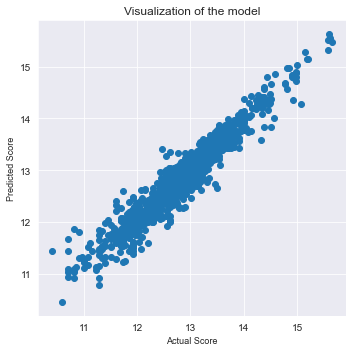

In [53]:
plt.figure(figsize = [5,5])
plt.scatter(y_test,XGB.predict(x_test))
plt.xlabel('Actual Score', fontsize=9)
plt.ylabel('Predicted Score',fontsize=9)
plt.title('Visualization of the model', fontsize = 12)
plt.tight_layout()

In [54]:
#Checking Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(XGB,x_train,y_train,cv=5)

cvs.mean()

0.91834535068181

# HyperParameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
LR_Params = {'copy_X':[True,False],
         'fit_intercept':[True,False],
        'normalize' :[True,False]}

DT_Params = {'criterion':['mse','mae'],
        'splitter': ['best', 'random'],
          'min_samples_leaf': list(range(8,14)),
         'min_samples_split': list(range(8,14)),
         'max_depth':list(range(8,14))}


RF_Params =  {'n_estimators':[140,160],
         'max_depth':list(range(8,14)),
         'min_samples_leaf': list(range(8,14)),
         'min_samples_split': list(range(8,14))}


XGB_Params = {'max_depth':list(range(8,14)),
         'n_estimators':[100,120],
          'learning_rate' :[0.25,0.30],
             'booster':['gbtree','gblinear']}

ABR_Params = {'n_estimators':[100,120],
        'learning_rate' :[0.25,0.30],
          'loss' : ['linear', 'square', 'exponential']}

In [57]:
LR_grid = GridSearchCV(LR, param_grid= LR_Params, cv = 2, n_jobs=-1)

DT_grid = GridSearchCV(DT, param_grid= DT_Params, cv = 2, n_jobs=-1)

RF_grid = GridSearchCV(RF, param_grid= RF_Params, cv = 2, n_jobs=-1)

XGB_grid = GridSearchCV(XGB, param_grid= XGB_Params, cv = 2, n_jobs=-1)

ABR_grid = GridSearchCV(ABR, param_grid= ABR_Params, cv = 2, n_jobs=-1)

In [60]:
LR_grid.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [61]:
DT_grid.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [8, 9, 10, 11, 12, 13],
                         'min_samples_leaf': [8, 9, 10, 11, 12, 13],
                         'min_samples_split': [8, 9, 10, 11, 12, 13],
                         'splitter': ['best', 'random']})

In [ ]:
RF_grid.fit(x_train,y_train)

In [ ]:
XGB_grid.fit(x_train,y_train)

In [ ]:
ABR_grid.fit(x_train,y_train)

In [ ]:
print('Best Estimators == > \n', LR_grid.best_params_)
print('Best Estimators == > \n', DT_grid.best_params_)
print('Best Estimators == > \n', RF_grid.best_params_)
print('Best Estimators == > \n', ABR_grid.best_params_)

In [ ]:
LR_clf= LR_grid.best_estimator_

DT_clf= DT_grid.best_estimator_

RF_clf= RF_grid.best_estimator_

XGB_clf= XGB_grid.best_estimator_

ABR_clf= ABR_grid.best_estimator_

In [ ]:
print("Linear Regression",LR_clf.fit(x_train, y_train))
print("Decision Tree Regression",DT_clf.fit(x_train, y_train))
print("Random Forest Regression",RF_clf.fit(x_train, y_train))
print("XGB Regression",XGB_clf.fit(x_train, y_train))
print("Adaboost Regression",ABR_clf.fit(x_train, y_train))

In [ ]:
#Accuracy scores
print('Linear Regression =',LR_clf.score(x_test,y_test))
print('Decision Tree =',DT_clf.score(x_test,y_test))
print('Random Forest =',RF_clf.score(x_test,y_test))
print('XGB =',XGB_clf.score(x_test,y_test))
print('Ada Boost Regressor =',ABR_clf.score(x_test,y_test))

In [ ]:
#Accuracy score
print('Linear Regression =', mean_squared_error(y_test,LR_clf.predict(x_test)))
print('Decision Tree =', mean_squared_error(y_test,DT_clf.predict(x_test)))
print('Random Forest =', mean_squared_error(y_test,RF_clf.predict(x_test)))
print('SVC =', mean_squared_error(y_test,XGB_clf.predict(x_test)))
print('Ada Boost Regressor =', mean_squared_error(y_test,ABR_clf.predict(x_test)))

In [ ]:
# Checking Cross Validation Score
from sklearn.model_selection import cross_val_score

cvs_svc = cross_val_score(XGB_clf,x,y,cv=3)

cvs_svc.mean()

In [ ]:
plt.figure(figsize = [7,6])
plt.scatter(y_test,XGB_clf.predict(x_test))
plt.xlabel('Actual Score', fontsize=15)
plt.ylabel('Predicted Score',fontsize=15)
plt.title('Visualization of the model', fontsize = 20)
plt.tight_layout()

In [ ]:
Saving The Model

In [ ]:
import joblib
filename = 'Used_Cars_Price.sav'
joblib.dump(XGB, filename)